In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [29]:
df=pd.read_excel(r"C:\Users\user\Downloads\Sample_Longlist_Data.xlsx")
df.head()

,Date Added,category,sellerlink,sellerlink-url,sellerstorefront-url,sellerproductcount,sellerratings,sellerdetails,seller business name,businessaddress,Count of seller brands,Max % of negative seller ratings - last 30 days,Max % of negative seller ratings - last 90 days,Max % of negative seller ratings - last 12 months,Hero Product 1 #ratings,Hero Product 2 #ratings,Sample brand name,Sample Brand URL
0,2020-11-15,Garden,Seller 1,Seller 1-link,Seller 1-storefrontlink,"1-16 of over 100,000 results",88% positive in the last 12 months (118 ratings),Lohas Living Inc James Mazzello US 845 3RD Ave...,Business Name:Lohas Living Inc,411 THEODORE FREMD AVESTE 206 SOUTHRyeNY10580-...,16,17,11,12,5873,4957,Visit the YAMAZAKI Store,https://www.amazon.de/-/en/stores/YAMAZAKI/pag...
1,2020-11-15,Garden,Seller 2,Seller 2-link,Seller 2-storefrontlink,NaN,90% positive in the last 12 months (566 ratings),Herzlich Willkommen im Amazon Shop von 1a-Hand...,Business Name:1a-Handelsagentur,1a HandelsagenturLindenallee 2MalchowMecklenbu...,0,2,2,9,0,0,Visit the tesa Store,https://www.amazon.de/-/en/stores/tesa/page/12...
2,2020-11-15,Garden,Seller 3,Seller 3-link,Seller 3-storefrontlink,"1-16 of over 2,000 results",85% positive in the last 12 months (75 ratings),67878u6i7 is committed to providing each custo...,Business Name:nantongaohuanfangzhipinyouxiango...,zhongnanshijicheng27zhuang1410haochongchuanqun...,15,0,25,12,164,162,TXYFYP,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...
3,2020-11-15,Garden,Seller 4,Seller 4-link,Seller 4-storefrontlink,1-16 of 123 results,NaN,7 days home life supermarket is committed to p...,Business Name:Zhengzhou Yaoqiong Trading Company,河南省中兴南路福禄街自贸试验区郑州片区（郑东）河南商会大厦1901室450000CN,1,0,0,0,0,0,SHIFENG,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...
4,2020-11-15,Garden,Seller 5,Seller 5-link,Seller 5-storefrontlink,"1-16 of over 1,000 results",81% positive in the last 12 months (52 ratings),78 68yui678 is committed to providing each cus...,Business Name:shenzhenfeichangshangmeimaoyiyou...,minzhidadaoshaxialaocun94dongA901longhuaxinqus...,16,0,31,15,224,113,YUOKI99,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...


In [30]:
new_df=df.copy()

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1839 entries, 0 to 1838
Data columns (total 18 columns):
 #   Column                                             Non-Null Count  Dtype         
---  ------                                             --------------  -----         
 0   Date Added                                         1839 non-null   datetime64[ns]
 1   category                                           1839 non-null   object        
 2   sellerlink                                         1839 non-null   object        
 3   sellerlink-url                                     1839 non-null   object        
 4   sellerstorefront-url                               1839 non-null   object        
 5   sellerproductcount                                 1513 non-null   object        
 6   sellerratings                                      1411 non-null   object        
 7   sellerdetails                                      1812 non-null   object        
 8   seller business na

In [32]:
df.isnull().sum()

Date Added                                             0
category                                               0
sellerlink                                             0
sellerlink-url                                         0
sellerstorefront-url                                   0
sellerproductcount                                   326
sellerratings                                        428
sellerdetails                                         27
seller business name                                  56
businessaddress                                       75
Count of seller brands                                 0
Max % of negative seller ratings - last 30 days        0
Max % of negative seller ratings - last 90 days        0
Max % of negative seller ratings - last 12 months      0
Hero Product 1 #ratings                                0
Hero Product 2 #ratings                                0
Sample brand name                                      4
Sample Brand URL               

In [33]:
missing_value_per = df.isnull().sum()/new_df.shape[0] * 100
missing_value_per

Date Added                                            0.000000
category                                              0.000000
sellerlink                                            0.000000
sellerlink-url                                        0.000000
sellerstorefront-url                                  0.000000
sellerproductcount                                   17.727026
sellerratings                                        23.273518
sellerdetails                                         1.468189
seller business name                                  3.045133
businessaddress                                       4.078303
Count of seller brands                                0.000000
Max % of negative seller ratings - last 30 days       0.000000
Max % of negative seller ratings - last 90 days       0.000000
Max % of negative seller ratings - last 12 months     0.000000
Hero Product 1 #ratings                               0.000000
Hero Product 2 #ratings                               0

In [34]:
# drop rows with null value
df = df.dropna()

In [35]:
df.shape

(1159, 18)

In [36]:
df['Positive_per_rating'] = df['sellerratings'].apply(lambda x: x.split()[0].strip())

In [49]:
df.head()

,Date Added,category,sellerlink,sellerlink-url,sellerstorefront-url,sellerproductcount,sellerratings,sellerdetails,seller business name,businessaddress,...,Max % of negative seller ratings - last 12 months,Hero Product 1 #ratings,Hero Product 2 #ratings,Sample brand name,Sample Brand URL,Positive_per_rating,Product_Count,Rating_in_numbers,E-mail,Phone_Number
0,2020-11-15,Garden,Seller 1,Seller 1-link,Seller 1-storefrontlink,"1-16 of over 100,000 results",88% positive in the last 12 months (118 ratings),Lohas Living Inc James Mazzello US 845 3RD Ave...,Business Name:Lohas Living Inc,411 THEODORE FREMD AVESTE 206 SOUTHRyeNY10580-...,...,12,5873,4957,Visit the YAMAZAKI Store,https://www.amazon.de/-/en/stores/YAMAZAKI/pag...,88%,100000,118,jadgemaello@gmail.com,1208-964-6807
2,2020-11-15,Garden,Seller 3,Seller 3-link,Seller 3-storefrontlink,"1-16 of over 2,000 results",85% positive in the last 12 months (75 ratings),67878u6i7 is committed to providing each custo...,Business Name:nantongaohuanfangzhipinyouxiango...,zhongnanshijicheng27zhuang1410haochongchuanqun...,...,12,164,162,TXYFYP,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...,85%,2000,75,,NaN
4,2020-11-15,Garden,Seller 5,Seller 5-link,Seller 5-storefrontlink,"1-16 of over 1,000 results",81% positive in the last 12 months (52 ratings),78 68yui678 is committed to providing each cus...,Business Name:shenzhenfeichangshangmeimaoyiyou...,minzhidadaoshaxialaocun94dongA901longhuaxinqus...,...,15,224,113,YUOKI99,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...,81%,1000,52,,NaN
8,2020-11-15,Garden,Seller 9,Seller 9-link,Seller 9-storefrontlink,1-16 of 133 results,100% positive lifetime (4 total ratings),7WallArts is committed to providing each custo...,Business Name:SEVEN WALL ARTS (XIAMEN) LIMITED,No.267 Northern Industrial Zone Jinli VillageH...,...,0,65,9,SEVEN WALL ARTS,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...,100%,133,4,,NaN
10,2020-11-15,Garden,Seller 11,Seller 11-link,Seller 11-storefrontlink,"1-16 of over 4,000 results",100% positive lifetime (3 total ratings),888hahahahahaha is committed to providing each...,Business Name:LinFenJingJiKaiFaQuGaoWeiWeiPiJu...,KaiFaQuHeFenLuWuZhouGuoJiGuangChang2CengL221Ha...,...,0,2,0,TYXTYX,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...,100%,4000,3,,NaN


In [38]:
df['Product_Count'] = df['sellerproductcount'].apply(lambda x: x.split()[-2].strip())

In [40]:
df['Product_Count'] = df['Product_Count'].str.replace(',','')
df['Product_Count'].astype('int')
df.head()

,Date Added,category,sellerlink,sellerlink-url,sellerstorefront-url,sellerproductcount,sellerratings,sellerdetails,seller business name,businessaddress,Count of seller brands,Max % of negative seller ratings - last 30 days,Max % of negative seller ratings - last 90 days,Max % of negative seller ratings - last 12 months,Hero Product 1 #ratings,Hero Product 2 #ratings,Sample brand name,Sample Brand URL,Positive_per_rating,Product_Count
0,2020-11-15,Garden,Seller 1,Seller 1-link,Seller 1-storefrontlink,"1-16 of over 100,000 results",88% positive in the last 12 months (118 ratings),Lohas Living Inc James Mazzello US 845 3RD Ave...,Business Name:Lohas Living Inc,411 THEODORE FREMD AVESTE 206 SOUTHRyeNY10580-...,16,17,11,12,5873,4957,Visit the YAMAZAKI Store,https://www.amazon.de/-/en/stores/YAMAZAKI/pag...,88%,100000
2,2020-11-15,Garden,Seller 3,Seller 3-link,Seller 3-storefrontlink,"1-16 of over 2,000 results",85% positive in the last 12 months (75 ratings),67878u6i7 is committed to providing each custo...,Business Name:nantongaohuanfangzhipinyouxiango...,zhongnanshijicheng27zhuang1410haochongchuanqun...,15,0,25,12,164,162,TXYFYP,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...,85%,2000
4,2020-11-15,Garden,Seller 5,Seller 5-link,Seller 5-storefrontlink,"1-16 of over 1,000 results",81% positive in the last 12 months (52 ratings),78 68yui678 is committed to providing each cus...,Business Name:shenzhenfeichangshangmeimaoyiyou...,minzhidadaoshaxialaocun94dongA901longhuaxinqus...,16,0,31,15,224,113,YUOKI99,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...,81%,1000
8,2020-11-15,Garden,Seller 9,Seller 9-link,Seller 9-storefrontlink,1-16 of 133 results,100% positive lifetime (4 total ratings),7WallArts is committed to providing each custo...,Business Name:SEVEN WALL ARTS (XIAMEN) LIMITED,No.267 Northern Industrial Zone Jinli VillageH...,1,0,0,0,65,9,SEVEN WALL ARTS,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...,100%,133
10,2020-11-15,Garden,Seller 11,Seller 11-link,Seller 11-storefrontlink,"1-16 of over 4,000 results",100% positive lifetime (3 total ratings),888hahahahahaha is committed to providing each...,Business Name:LinFenJingJiKaiFaQuGaoWeiWeiPiJu...,KaiFaQuHeFenLuWuZhouGuoJiGuangChang2CengL221Ha...,15,0,0,0,2,0,TYXTYX,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...,100%,4000


In [41]:
df['Rating_in_numbers'] = df['sellerratings'].apply(lambda x: x.split('(')[1].strip())

In [42]:
df['Rating_in_numbers'] = df['Rating_in_numbers'].apply(lambda x: x.split()[0].strip())
df['Rating_in_numbers'].astype('int')

0       118
2        75
4        52
8         4
10        3
       ... 
1833     15
1834     46
1836      1
1837      3
1838      2
Name: Rating_in_numbers, Length: 1159, dtype: int32

In [43]:
import re

In [46]:
# Finding the emails of the sellers 
def email_of_sellers(text):
    email = re.findall(r'[\w\.-]+@[\w\.-]+',str(text))
    return ",".join(email)
df['E-mail']=df['sellerdetails'].apply(lambda x: email_of_sellers(x))

In [48]:
#parsing phone numbers
df['Phone_Number'] = df['sellerdetails'].str.extract(r"(?:\+|\bTel\.?:|\bFax\.?:|\bTelefon:)\s*(\d+(?:[ ]*[ /-]|[ - /\(0)]*\d+[(0)]*\d+[ /-]*\d+[-]*\d+)*)")

In [50]:
df['Businees_Location'] = df['businessaddress'].str[-2:]

In [53]:
final_df = df[df['Businees_Location']!='CN']

In [56]:
final_df.drop(labels=['sellerproductcount','sellerratings'],axis=1)

,Date Added,category,sellerlink,sellerlink-url,sellerstorefront-url,sellerdetails,seller business name,businessaddress,Count of seller brands,Max % of negative seller ratings - last 30 days,...,Hero Product 1 #ratings,Hero Product 2 #ratings,Sample brand name,Sample Brand URL,Positive_per_rating,Product_Count,Rating_in_numbers,E-mail,Phone_Number,Businees_Location
0,2020-11-15,Garden,Seller 1,Seller 1-link,Seller 1-storefrontlink,Lohas Living Inc James Mazzello US 845 3RD Ave...,Business Name:Lohas Living Inc,411 THEODORE FREMD AVESTE 206 SOUTHRyeNY10580-...,16,17,...,5873,4957,Visit the YAMAZAKI Store,https://www.amazon.de/-/en/stores/YAMAZAKI/pag...,88%,100000,118,jadgemaello@gmail.com,1208-964-6807,US
14,2020-11-15,Garden,Seller 15,Seller 15-link,Seller 15-storefrontlink,Impressum\n \n Gesetzliche Anbieterkennung:\n ...,Business Name:Oliver Mills,Kaiserstr.12Borgholzhausen33829DE,15,0,...,1446,921,Unbekannt,https://www.amazon.de/-/en/Unbekannt/b/ref=bl_...,97%,919,116,webmaster@9pm-store.de,015140008562,DE
22,2020-11-15,Garden,Seller 23,Seller 23-link,Seller 23-storefrontlink,Bestof Floral is committed to providing each c...,Business Name:MADEWELL SUPPLY INC,90 BROAD ST 2ND FLOORNEW YORKNY10004-2205US,16,0,...,10538,8293,Visit the Seville Classics Store,https://www.amazon.de/-/en/stores/Seville+Clas...,100%,40000,10,,NaN,US
23,2020-11-15,Garden,Seller 24,Seller 24-link,Seller 24-storefrontlink,Blumenbecker Industriebedarf GmbH Sudhoferweg ...,Business Name:Blumenbecker Industriebedarf GmbH,Sudhoferweg 99-107BeckumNRW59269DE,15,15,...,30139,11182,Visit the tesa Store,https://www.amazon.de/-/en/stores/tesa/page/12...,88%,100000,3134,bib.beckum@blumenbecker.com,02521/8406-0,DE
24,2020-11-15,Garden,Seller 25,Seller 25-link,Seller 25-storefrontlink,Herzlich willkommen auf unserer Internetpräsen...,Business Name:Jörg Müller & Petra Scheerer GbR,Miranderstr.21Korntal-Münchingen70825DE,15,3,...,3286,3079,Neudorff,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...,97%,3000,610,,NaN,DE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1784,2020-11-15,Garden,Seller 1785,Seller 1785-link,Seller 1785-storefrontlink,Impressum nach TMG:\n\nZoreno Versandhandel Gm...,Business Name:Zoreno Versandhandel GmbH,Blegistrasse 25BaarZG6340CH,16,3,...,25802,4979,(blank),(blank),98%,100000,2630,ade.support@zoreno.com,NaN,CH
1785,2020-11-15,Garden,Seller 1786,Seller 1786-link,Seller 1786-storefrontlink,Zorgthuiswinkel is committed to providing each...,Business Name:ZORGTHUISWINKEL.NL,industriestraat 1RijenNoord brabant5121LENL,15,0,...,2043,1134,St Helens Home and Garden,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...,100%,285,3,,NaN,NL
1808,2020-11-15,Garden,Seller 1809,Seller 1809-link,Seller 1809-storefrontlink,Zündholz Riesa is committed to providing each ...,Business Name:AD-ACCESS-Zündholz Riesa GmbH,Paul-Greifzu-Straße22Riesa01591DE,8,0,...,65,41,NOLA,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...,100%,52,16,,NaN,DE
1814,2020-11-15,Garden,Seller 1815,Seller 1815-link,Seller 1815-storefrontlink,Reinhard Joormann -FansandTrends- e.K. Im St...,Business Name:Reinhard Joormann -FansandTrends...,Im Stadtsfeld 55Dorsten46282DE,15,6,...,636,466,Star-Max,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...,91%,1000,3075,"r.joormann@googlemail.com,r.joormann@googlemai...",023626057826,DE


In [67]:
final_df[[ 'Product_Count','Rating_in_numbers']] = final_df[[ 'Product_Count','Rating_in_numbers']].apply(pd.to_numeric)
print(final_df.dtypes)

Date Added                                           datetime64[ns]
category                                                     object
sellerlink                                                   object
sellerlink-url                                               object
sellerstorefront-url                                         object
sellerproductcount                                           object
sellerratings                                                object
sellerdetails                                                object
seller business name                                         object
businessaddress                                              object
Count of seller brands                                        int64
Max % of negative seller ratings - last 30 days               int64
Max % of negative seller ratings - last 90 days               int64
Max % of negative seller ratings - last 12 months             int64
Hero Product 1 #ratings                         

C:\Users\user\AppData\Local\Temp\ipykernel_11036\1044828855.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df[[ 'Product_Count','Rating_in_numbers']] = final_df[[ 'Product_Count','Rating_in_numbers']].apply(pd.to_numeric)


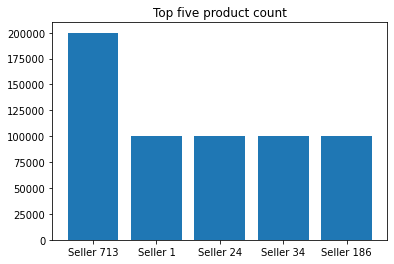

In [71]:
top_5_product=final_df.nlargest(5, ['Product_Count'])
plt.bar(top_5_product['sellerlink'],top_5_product['Product_Count'])
plt.title("Top five product count")
plt.show()

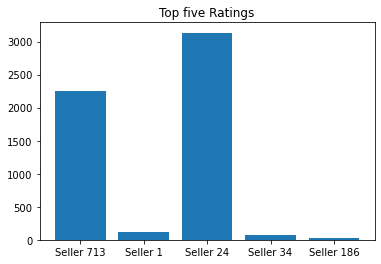

In [72]:
top_5_ratings=final_df.nlargest(5, ['Rating_in_numbers'])
plt.bar(top_5_product['sellerlink'],top_5_product['Rating_in_numbers'])
plt.title("Top five Ratings")
plt.show()

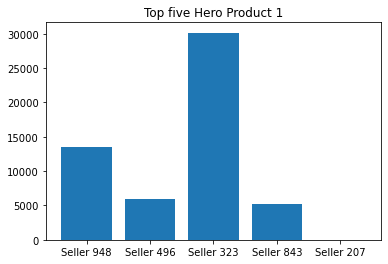

In [80]:
top_Hero_product=final_df.nlargest(5, ['Hero Product 1 #ratings'])
plt.bar(top_Hero_product['sellerlink'],top_5_product['Hero Product 1 #ratings'])
plt.title("Top five Hero Product 1")
plt.show()

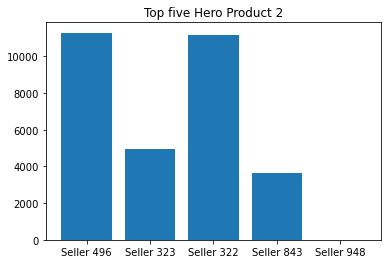

In [81]:
top_Hero_product=final_df.nlargest(5, ['Hero Product 2 #ratings'])
plt.bar(top_Hero_product['sellerlink'],top_5_product['Hero Product 2 #ratings'])
plt.title("Top five Hero Product 2")
plt.show()

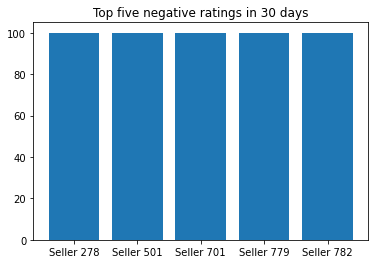

In [87]:
top_negative_ratings_30=final_df.nlargest(5, ['Max % of negative seller ratings - last 30 days'])
top_negative_ratings_90=final_df.nlargest(5, ['Max % of negative seller ratings - last 90 days'])
top_negative_ratings_12=final_df.nlargest(5, ['Max % of negative seller ratings - last 12 months'])
plt.bar(top_negative_ratings_30['sellerlink'],top_negative_ratings_30['Max % of negative seller ratings - last 30 days'])
plt.title("Top five negative ratings in 30 days")
plt.show()

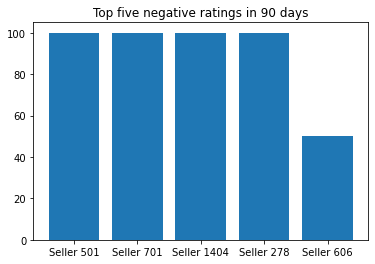

In [88]:
top_negative_ratings_30=final_df.nlargest(5, ['Max % of negative seller ratings - last 30 days'])
top_negative_ratings_90=final_df.nlargest(5, ['Max % of negative seller ratings - last 90 days'])
top_negative_ratings_12=final_df.nlargest(5, ['Max % of negative seller ratings - last 12 months'])
plt.bar(top_negative_ratings_90['sellerlink'],top_negative_ratings_90['Max % of negative seller ratings - last 30 days'])
plt.title("Top five negative ratings in 90 days")
plt.show()

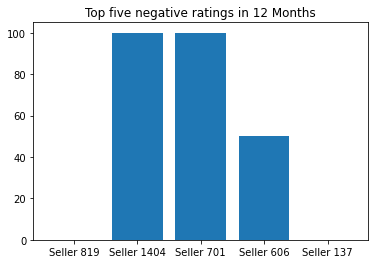

In [89]:
top_negative_ratings_30=final_df.nlargest(5, ['Max % of negative seller ratings - last 30 days'])
top_negative_ratings_90=final_df.nlargest(5, ['Max % of negative seller ratings - last 90 days'])
top_negative_ratings_12=final_df.nlargest(5, ['Max % of negative seller ratings - last 12 months'])
plt.bar(top_negative_ratings_12['sellerlink'],top_negative_ratings_12['Max % of negative seller ratings - last 30 days'])
plt.title("Top five negative ratings in 12 Months")
plt.show()

In [90]:
def hero_Products(row):
    
    if row['Hero Product 1 #ratings'] > row['Hero Product 2 #ratings']:
        val = 'Hero Product 1'
    elif row['Hero Product 1 #ratings'] == row['Hero Product 2 #ratings']:
        val = 'Same Ratings'
    else:
        val = 'Hero Product 2'
    return val

In [91]:
final_df['Best_Selling_Products'] = final_df.apply(hero_Products, axis=1)

C:\Users\user\AppData\Local\Temp\ipykernel_11036\1786362280.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Best_Selling_Products'] = final_df.apply(hero_Products, axis=1)


In [94]:
final_df

,Date Added,category,sellerlink,sellerlink-url,sellerstorefront-url,sellerproductcount,sellerratings,sellerdetails,seller business name,businessaddress,...,Sample Brand URL,Positive_per_rating,Product_Count,Rating_in_numbers,E-mail,Phone_Number,Businees_Location,Best_Selling_Products,Hero Product 1,Same Ratings
0,2020-11-15,Garden,Seller 1,Seller 1-link,Seller 1-storefrontlink,"1-16 of over 100,000 results",88% positive in the last 12 months (118 ratings),Lohas Living Inc James Mazzello US 845 3RD Ave...,Business Name:Lohas Living Inc,411 THEODORE FREMD AVESTE 206 SOUTHRyeNY10580-...,...,https://www.amazon.de/-/en/stores/YAMAZAKI/pag...,88%,100000,118,jadgemaello@gmail.com,1208-964-6807,US,Hero Product 1,Same Ratings,Same Ratings
14,2020-11-15,Garden,Seller 15,Seller 15-link,Seller 15-storefrontlink,1-16 of 919 results,97% positive in the last 12 months (116 ratings),Impressum\n \n Gesetzliche Anbieterkennung:\n ...,Business Name:Oliver Mills,Kaiserstr.12Borgholzhausen33829DE,...,https://www.amazon.de/-/en/Unbekannt/b/ref=bl_...,97%,919,116,webmaster@9pm-store.de,015140008562,DE,Hero Product 1,Same Ratings,Same Ratings
22,2020-11-15,Garden,Seller 23,Seller 23-link,Seller 23-storefrontlink,"1-16 of over 40,000 results",100% positive in the last 12 months (10 ratings),Bestof Floral is committed to providing each c...,Business Name:MADEWELL SUPPLY INC,90 BROAD ST 2ND FLOORNEW YORKNY10004-2205US,...,https://www.amazon.de/-/en/stores/Seville+Clas...,100%,40000,10,,NaN,US,Hero Product 1,Same Ratings,Same Ratings
23,2020-11-15,Garden,Seller 24,Seller 24-link,Seller 24-storefrontlink,"1-16 of over 100,000 results",88% positive in the last 12 months (3134 ratings),Blumenbecker Industriebedarf GmbH Sudhoferweg ...,Business Name:Blumenbecker Industriebedarf GmbH,Sudhoferweg 99-107BeckumNRW59269DE,...,https://www.amazon.de/-/en/stores/tesa/page/12...,88%,100000,3134,bib.beckum@blumenbecker.com,02521/8406-0,DE,Hero Product 1,Same Ratings,Same Ratings
24,2020-11-15,Garden,Seller 25,Seller 25-link,Seller 25-storefrontlink,"1-16 of over 3,000 results",97% positive in the last 12 months (610 ratings),Herzlich willkommen auf unserer Internetpräsen...,Business Name:Jörg Müller & Petra Scheerer GbR,Miranderstr.21Korntal-Münchingen70825DE,...,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...,97%,3000,610,,NaN,DE,Hero Product 1,Same Ratings,Same Ratings
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1784,2020-11-15,Garden,Seller 1785,Seller 1785-link,Seller 1785-storefrontlink,"1-16 of over 100,000 results",98% positive in the last 12 months (2630 ratings),Impressum nach TMG:\n\nZoreno Versandhandel Gm...,Business Name:Zoreno Versandhandel GmbH,Blegistrasse 25BaarZG6340CH,...,(blank),98%,100000,2630,ade.support@zoreno.com,NaN,CH,Hero Product 1,Same Ratings,Same Ratings
1785,2020-11-15,Garden,Seller 1786,Seller 1786-link,Seller 1786-storefrontlink,1-16 of 285 results,100% positive lifetime (3 total ratings),Zorgthuiswinkel is committed to providing each...,Business Name:ZORGTHUISWINKEL.NL,industriestraat 1RijenNoord brabant5121LENL,...,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...,100%,285,3,,NaN,NL,Hero Product 1,Same Ratings,Same Ratings
1808,2020-11-15,Garden,Seller 1809,Seller 1809-link,Seller 1809-storefrontlink,1-16 of 52 results,100% positive in the last 12 months (16 ratings),Zündholz Riesa is committed to providing each ...,Business Name:AD-ACCESS-Zündholz Riesa GmbH,Paul-Greifzu-Straße22Riesa01591DE,...,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...,100%,52,16,,NaN,DE,Hero Product 1,Same Ratings,Same Ratings
1814,2020-11-15,Garden,Seller 1815,Seller 1815-link,Seller 1815-storefrontlink,"1-16 of over 1,000 results",91% positive in the last 12 months (3075 ratings),Reinhard Joormann -FansandTrends- e.K. Im St...,Business Name:Reinhard Joormann -FansandTrends...,Im Stadtsfeld 55Dorsten46282DE,...,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...,91%,1000,3075,"r.joormann@googlemail.com,r.joorman